In [79]:

# A histogram is a graph showing frequency distributions.
# aio = All In One

# Import the necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np

In [80]:
# Load a CSV file into a Pandas DataFrame
df = pd.read_csv("datos_limpios_Empresas.csv")

In [81]:
# Return a tuple representing the dimensionality of the DataFrame.
# First value  = Number of Rows including the header.
# Second value = Number of Columns.
df.shape

(29998, 11)

In [82]:
df

,NIT,RAZÓN_SOCIAL,SUPERVISOR,DEPARTAMENTO_DOMICILIO,CIUDAD_DOMICILIO,MACROSECTOR,INGRESOS_OPERACIONALES,GANANCIA_PÉRDIDA,TOTAL_ACTIVOS,TOTAL_PASIVOS,TOTAL_PATRIMONIO
0,899999068,ECOPETROL S.A,SUPERFINANCIERA,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,MINERO,144.82,33.41,216.85,125.81,91.03
1,900112515,REFINERIA DE CARTAGENA S.A.S,SUPERSOCIEDADES,BOLIVAR,CARTAGENA-BOLIVAR,MANUFACTURA,27.86,2.19,42.84,16.48,26.36
2,830095213,ORGANIZACIÓN TERPEL S.A.,SUPERFINANCIERA,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,COMERCIO,23.60,0.33,7.48,4.47,3.01
3,860069804,CARBONES DEL CERREJON LIMITED,SUPERSOCIEDADES,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,MINERO,16.39,6.05,10.45,9.00,1.45
4,800021308,DRUMMOND LTD,SUPERSOCIEDADES,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,MINERO,15.27,2.16,14.27,6.34,7.93
...,...,...,...,...,...,...,...,...,...,...,...
29993,800215707,SERVICIOS Y PROCESOS SERPRO SAS,SUPERSOCIEDADES,BOGOTA D.C.,"BOGOTA, D.C.-BOGOTA D.C.",COMERCIO,0.02,0.00,0.01,0.01,0.01
29994,900895431,TEMPORAL ACTIVA S.A.S,SUPERSOCIEDADES,SANTANDER,FLORIDABLANCA-SANTANDER-SANTANDER,SERVICIOS,0.02,0.00,0.01,0.00,0.01
29995,900208659,DAMIS S.A.S,SUPERSOCIEDADES,VALLE,YUMBO-VALLE-VALLE,MANUFACTURA,0.02,0.00,0.02,0.01,0.01
29996,901097082,DISTRIBUCIONES NUEVO HORIZONTE DEL CASANARE S....,SUPERSOCIEDADES,CASANARE,YOPAL-CASANARE-CASANARE,COMERCIO,0.02,0.00,0.00,0.00,0.00


In [83]:
# Get the frequency table for the column mACROSECTOR
df.INGRESOS_OPERACIONALES.value_counts().sort_index()
valores_cantidad = df.INGRESOS_OPERACIONALES
valores_cantidad

0        144.82
1         27.86
2         23.60
3         16.39
4         15.27
          ...  
29993      0.02
29994      0.02
29995      0.02
29996      0.02
29997      0.02
Name: INGRESOS_OPERACIONALES, Length: 29998, dtype: float64

In [84]:
df.INGRESOS_OPERACIONALES.info()

<class 'pandas.core.series.Series'>
RangeIndex: 29998 entries, 0 to 29997
Series name: INGRESOS_OPERACIONALES
Non-Null Count  Dtype  
--------------  -----  
29998 non-null  float64
dtypes: float64(1)
memory usage: 234.5 KB


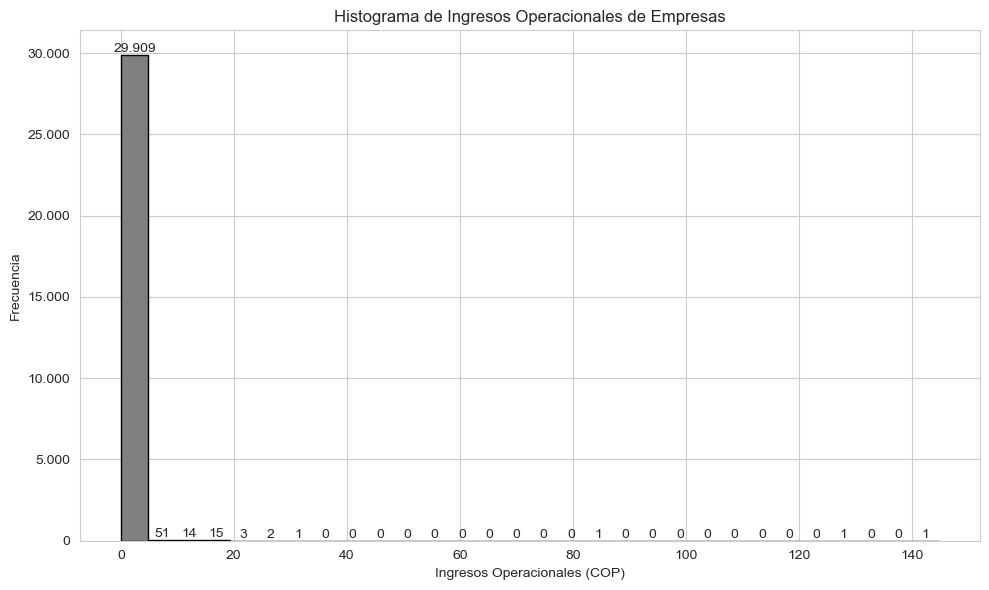

In [85]:
# Crear una figura con tamaño adecuado
plt.figure(figsize=(10, 6))

# Crear el histograma con INGRESOS_OPERACIONALES
n, bins, patches = plt.hist(df['INGRESOS_OPERACIONALES'], bins=30, color='gray', edgecolor='black')
#n, bins, patches = plt.hist(df['GANANCIA_PÉRDIDA'], bins=30, color='gray', edgecolor='black')
#n, bins, patches = plt.hist(df['TOTAL_ACTIVOS'], bins=30, color='gray', edgecolor='black')
#n, bins, patches = plt.hist(df['TOTAL_PASIVOS'], bins=30, color='gray', edgecolor='black')
#n, bins, patches = plt.hist(df['TOTAL_PATRIMONIO'], bins=30, color='gray', edgecolor='black')

# Función para formatear con separadores de miles (punto como separador)
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}'.replace(',', '.'))

# Aplicar el formateador a los ejes X e Y
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Añadir etiquetas de frecuencia encima de las barras
for i in range(len(n)):
    plt.text(
        bins[i] + (bins[i+1] - bins[i]) / 2,  # Centro de la barra
        n[i] + 0.1,  # Ligeramente por encima de la barra
        f'{int(n[i]):,}'.replace(',', '.'),  # Frecuencia con separador de miles
        ha='center', va='bottom', fontsize=10
    )

# Añadir título y etiquetas
plt.title('Histograma de Ingresos Operacionales de Empresas')
plt.xlabel('Ingresos Operacionales (COP)')
plt.ylabel('Frecuencia')

# Ajustar el diseño para evitar recortes
plt.tight_layout()

# Mostrar el gráfico
plt.show()


     

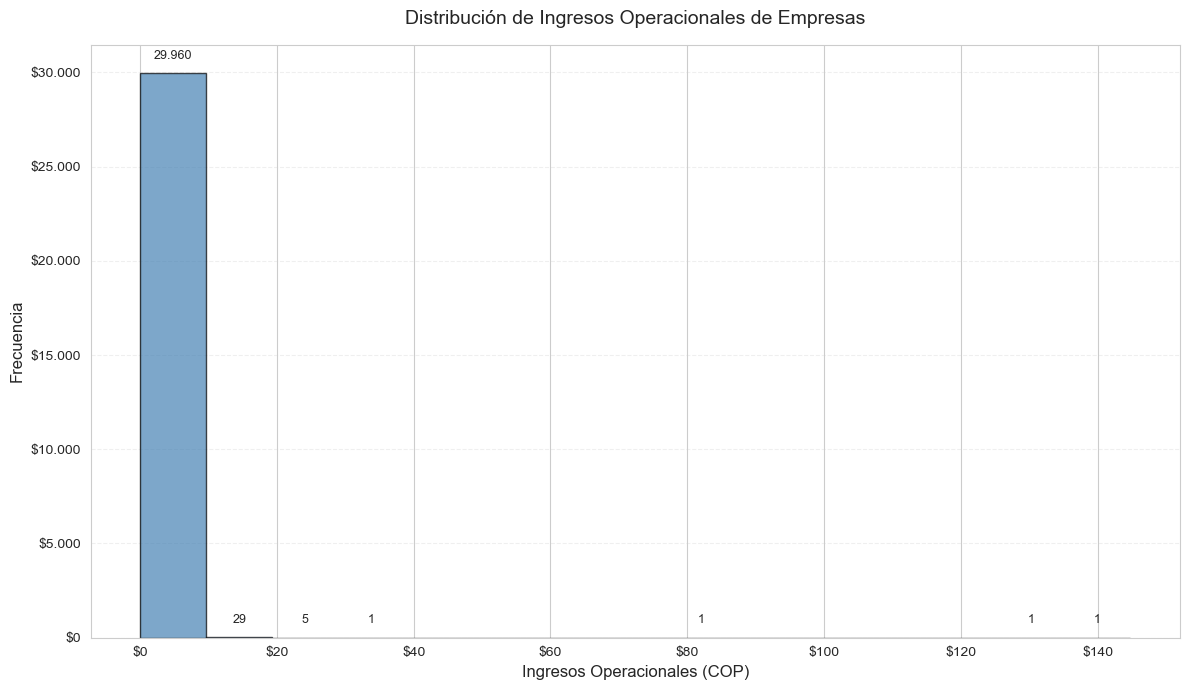

In [86]:
# Supongamos que df es tu DataFrame (asegúrate de cargarlo previamente)
# Ejemplo: df = pd.read_csv('tu_archivo.csv')

# Limpiar datos: Asegurarse de que INGRESOS_OPERACIONALES sea numérico y manejar nulos
df['INGRESOS_OPERACIONALES'] = pd.to_numeric(df['INGRESOS_OPERACIONALES'], errors='coerce')
df = df.dropna(subset=['INGRESOS_OPERACIONALES'])


# Configurar el estilo de Seaborn para un look más limpio
sns.set_style("whitegrid")

# Crear una figura con tamaño adecuado
plt.figure(figsize=(12, 7))

# Calcular número óptimo de bins (regla de Sturges)
bins = int(np.log2(len(df_filtered['INGRESOS_OPERACIONALES'])) + 1)

# Crear el histograma
n, bins, patches = plt.hist(
    df['INGRESOS_OPERACIONALES'],
    bins=bins,
    color='steelblue',
    edgecolor='black',
    alpha=0.7
)

# Función para formatear con separadores de miles y símbolo $
formatter = FuncFormatter(lambda x, pos: f'${int(x):,}'.replace(',', '.'))

# Aplicar el formateador a los ejes X e Y
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Añadir etiquetas de frecuencia encima de las barras
for i in range(len(n)):
    if n[i] > 0:  # Mostrar solo si la frecuencia no es cero
        plt.text(
            bins[i] + (bins[i+1] - bins[i]) / 2,  # Centro de la barra
            n[i] + max(n) * 0.02,  # Desplazamiento proporcional
            f'{int(n[i]):,}'.replace(',', '.'),  # Frecuencia con separador
            ha='center', va='bottom', fontsize=9
        )

# Añadir título y etiquetas
plt.title('Distribución de Ingresos Operacionales de Empresas', fontsize=14, pad=15)
plt.xlabel('Ingresos Operacionales (COP)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Añadir cuadrícula ligera en el eje Y
plt.grid(True, axis='y', linestyle='--', alpha=0.3)

# Ajustar el diseño para evitar recortes
plt.tight_layout()

# Mostrar el gráfico
plt.show()